# Exercise 1

In [ ]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


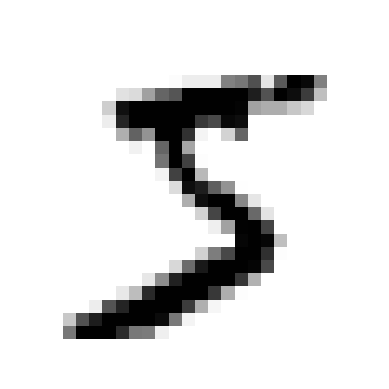

In [ ]:
plt.imshow(X[0].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
ddd

In [ ]:
params_grid = {"weights": ["uniform", "distance"], "n_neighbors": [3, 5, 10, 20, 50]}

grid_search = GridSearchCV(
    knn_clf,
    param_grid=params_grid)

# Exercise 3

In [51]:
from pathlib import Path
from google.colab import drive
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

import shutil
import os
import pandas as pd
import zipfile

In [9]:
drive.mount('/content/drive')

file_name = "kaggle.json"
drive_path = '/content/drive/MyDrive/' + file_name
kaggle_path = '/root/.kaggle/'

if not os.path.exists(kaggle_path):
  os.makedirs(kaggle_path)

shutil.copy(drive_path, kaggle_path)
os.chmod(kaggle_path, 600)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
def load_data(project_name):
    zip_path = Path(f"{project_name}.zip")
    if not zip_path.is_file():
        !kaggle competitions download -c $project_name
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall()
    train_set = pd.read_csv(Path("train.csv"))
    test_set = pd.read_csv(Path("test.csv"))
    sample_submission = pd.read_csv(Path("gender_submission.csv"))
    return (train_set, test_set, sample_submission)

In [11]:
train_set, test_set, sample_submission = load_data("titanic")

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 40.8MB/s]


In [12]:
train_set_cp = train_set.copy()

In [13]:
display(train_set_cp)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
train_set_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
print(train_set_cp["Sex"].value_counts())
print(train_set_cp["Embarked"].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [16]:
train_set_cp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
ordinal_encoder = OrdinalEncoder()
sex_encoded = ordinal_encoder.fit_transform(train_set_cp[["Sex"]])

imputer = SimpleImputer(strategy="most_frequent")
embarked_imputed = pd.DataFrame(imputer.fit_transform(train_set_cp[["Embarked"]]), columns=["Embarked"])
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
embarked_encoded = ohe_encoder.fit_transform(embarked_imputed)
embarked_encoded_feature_names = ohe_encoder.get_feature_names_out(ohe_encoder.feature_names_in_)
embarked_encoded_pd = pd.DataFrame(embarked_encoded.astype("int"), columns=embarked_encoded_feature_names)

train_set_cp_2 = train_set_cp.drop(["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
train_set_cp_2["Sex_enc"] = sex_encoded.astype("int")
train_set_cp_2 = pd.concat([train_set_cp_2, embarked_encoded_pd], axis=1)

display(train_set_cp_2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_enc,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [26]:
corr_matrix = train_set_cp_2.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived      1.000000
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.077221
Embarked_S   -0.149683
Pclass       -0.338481
Sex_enc      -0.543351
Name: Survived, dtype: float64

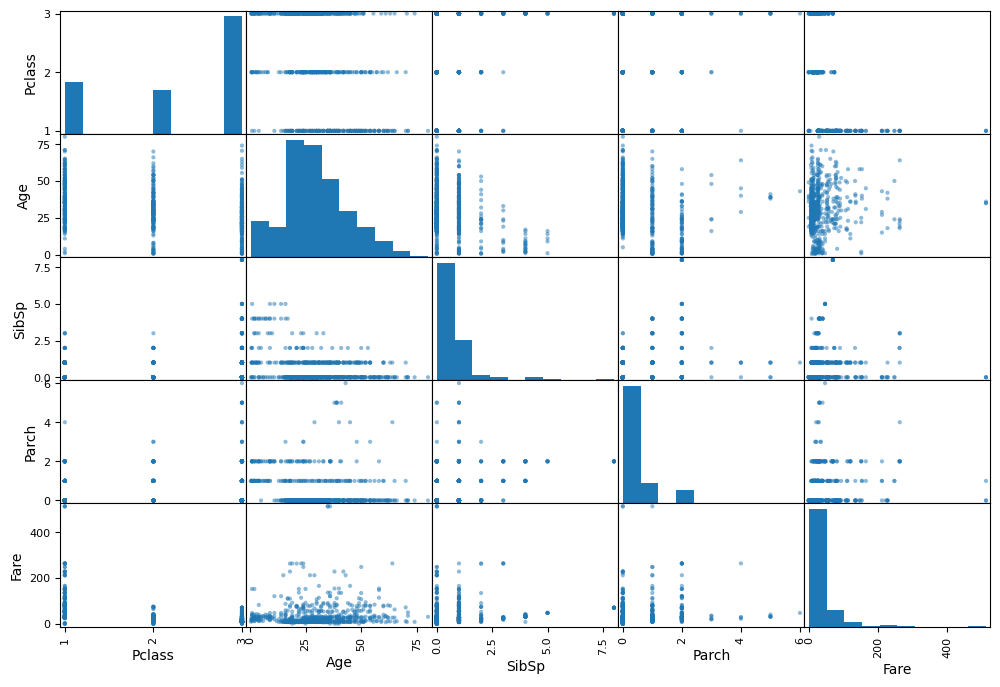

In [43]:
attributes = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
scatter_matrix(train_set_cp_2[attributes], figsize=(12, 8))
plt.show()

In [42]:
y_train = train_set["Survived"]
X_train = train_set.drop(["Survived"], axis=1)

In [55]:
sex_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(),
    StandardScaler())

embarked_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
    StandardScaler())

pclass_age_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler())

sibsp_parch_fare_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("ordinal", sex_pipeline, ["Sex"]),
    ("ohe", embarked_pipeline, ["Embarked"]),
    ("num_non_skewed", pclass_age_pipeline, ["Pclass", "Age"]),
    ("num_skewed", sibsp_parch_fare_pipeline, ["SibSp", "Parch", "Fare"])
  ],
  remainder="drop")

In [56]:
X_train_prep = pd.DataFrame(preprocessing.fit_transform(X_train), columns=preprocessing.get_feature_names_out())

X_train_prep.head()

,ordinal__Sex,ohe__Embarked_C,ohe__Embarked_Q,ohe__Embarked_S,num_non_skewed__Pclass,num_non_skewed__Age,num_skewed__SibSp,num_skewed__Parch,num_skewed__Fare
0,0.737695,-0.482043,-0.307562,0.615838,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.355574,2.074505,-0.307562,-1.623803,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,-1.355574,-0.482043,-0.307562,0.615838,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.355574,-0.482043,-0.307562,0.615838,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.737695,-0.482043,-0.307562,0.615838,0.827377,0.407926,-0.474545,-0.473674,-0.486337
